# **Background Business Statement for AWS SaaS Company**


AWS (Amazon Web Services) SaaS (Software as a Service) is a prominent player in the cloud computing industry, offering a comprehensive suite of sales and marketing software solutions designed for B2B (business-to-business) clients. Since its inception, AWS SaaS has leveraged the robust infrastructure and global reach of Amazon Web Services to deliver scalable, reliable, and secure cloud-based applications to businesses of all sizes.

AWS SaaS provides a wide array of services that enable companies to streamline their sales processes, enhance customer engagement, and drive marketing effectiveness. These services include customer relationship management (CRM) systems, marketing automation tools, sales analytics, and customer support platforms. By integrating these tools into a unified ecosystem, AWS SaaS helps businesses optimize their operations, improve decision-making, and achieve better business outcomes.

In 2024, AWS SaaS continues to expand its market presence and innovate its product offerings to meet the evolving needs of its customers. With a focus on data-driven insights, AWS SaaS is dedicated to helping businesses harness the power of their data to gain competitive advantages. The company’s commitment to excellence is reflected in its continuous investment in cutting-edge technologies, such as artificial intelligence (AI), machine learning (ML), and advanced analytics.

AWS SaaS operates on a subscription-based model, providing flexible and scalable solutions that cater to the specific needs of different industries. The company’s extensive customer base spans various sectors, including finance, healthcare, retail, and manufacturing. By delivering tailored solutions that address unique business challenges, AWS SaaS empowers organizations to accelerate their digital transformation journeys and achieve sustained growth.

As a Data Scientist analyzing AWS SaaS sales data, my role is to uncover key insights that will inform strategic decisions and drive business performance. Through rigorous analysis of transaction data, profit, and sales trends, I aim to provide actionable recommendations that will enhance profitability, optimize discount strategies, and support the company’s overarching goals of innovation and customer satisfaction.

# **Business Problem Statement**
Discount utilization is a critical aspect of AWS SaaS Sales strategy, impacting overall profitability. The company aims to assess the effectiveness of its current discounting strategy and its implications on profitabilityof each country and product.

**1. Analyze the impact of discounts on profitability**. The company seeks to understand how the use of discounts affects its overall profitability. By analyzing profit data in conjunction with discount utilization, the goal is to determine whether the current discounting strategy enhances or hampers profitability.
<br>

**2. Analyze effect of Discounts on Profitability in Low-Profit Countries**. The Company managing to understand the impact of discount utilization on profitability in countries with the lowest profit. The company seeks to ascertain whether discounting practices serve as drivers of increased sales or contribute to diminished profitability in these countries.
<br>

**3. Analyze impact of Discounts on Profitability of Low-Profit Products**. By analyzing profit data and discount patterns for the lowest profit products, we aim to uncover the extent to which discounting strategies can enhance or impair profitability.

In general, this analysis is to identify variables that may negatively influence profitability by using discounts based on Country and Product.

# **Goals**
By conducting these three analyses, AWS SaaS Sales can make informed and strategic decisions regarding the implementation of discounts. These insights will enable the company to optimize its discounting strategies, ultimately enhancing profitability and driving sustained business growth.

In [162]:
# import everything needed
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import pandas_geojson as pdg

# 1. **Load Dataset into a Dataframe**

In [163]:
df = pd.read_csv('Tableu Dataset/AWS SaaS Sales/SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# **2. Data Cleaning / Data Processing**

In [165]:
#checking NaN Value I
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [166]:
# checking missing/Nan value II
print('Missing values status:', df.isnull().values.any())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,Row ID,0,0.0
1,Customer ID,0,0.0
2,Discount,0,0.0
3,Quantity,0,0.0
4,Sales,0,0.0
5,License,0,0.0
6,Product,0,0.0
7,Segment,0,0.0
8,Industry,0,0.0
9,Customer,0,0.0


In [167]:
# erase column Row ID
df = df.drop(columns=['Row ID','Date Key'])
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [168]:
# checking data duplicate
data_duplicate = df[df.duplicated(subset=['Order ID', 'Contact Name','Sales','Profit'])]
display(len(data_duplicate))
data_duplicate

1

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3406,AMER-2020-150119,4/23/2020,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,TMZYTXLB5T,281.372,2,0.3,-12.0588


In [169]:
# more further checking data duplicate
df[df['Order ID'] == "AMER-2020-150119"]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3405,AMER-2020-150119,4/23/2020,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,KUQ229Y2EX,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,4/23/2020,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,TMZYTXLB5T,281.372,2,0.3,-12.0588
3407,AMER-2020-150119,4/23/2020,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,ContactMatcher,RGI1YUWB3S,7.488,8,0.7,-5.2416
3408,AMER-2020-150119,4/23/2020,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,SaaS Connector Pack,ZLM0BHQTD3,22.336,4,0.2,7.8176


In [170]:
# Check for duplicate rows and handle them if necessary

print("Number of duplicate rows:", df[df.duplicated()])

Number of duplicate rows: Empty DataFrame
Columns: [Order ID, Order Date, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: []


#### No removed because they have difference license

In [171]:
# change format 'Order Date' int to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [172]:
# df unique in each columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
2,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
3,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
4,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
5,Region,3,"[EMEA, AMER, APJ]"
6,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
7,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
8,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
9,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."


In [174]:
# checking white space
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,Order ID,False
1,Order Date,False
2,Contact Name,False
3,Country,False
4,City,False
5,Region,False
6,Subregion,False
7,Customer,False
8,Customer ID,False
9,Industry,False


### Checking any anomalies on numeric columns (negative values)

In [175]:
# Checking if there are negative values in each columns
numerical_cols = df.select_dtypes(include='number').columns
neg_cols = df[numerical_cols].columns[(df[numerical_cols] < 0).any()].tolist()
neg_cols

['Profit']

##### in the 'Profit' column there is a negative value, a temporary assumption exists that the company has difficulty in obtaining profits from sales

#### Checking Non Nummeric Columns

In [176]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Ch..."
1,APJ,"[Japan, Australia, Philippines, India, Singapo..."
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, Fran..."


In [177]:
df.groupby(['Region', 'Subregion'])['Country'].unique().reset_index()

,Region,Subregion,Country
0,AMER,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, ..."
1,AMER,NAMER,"[United States, Canada]"
2,APJ,ANZ,"[Australia, New Zealand]"
3,APJ,APAC,"[Philippines, Singapore, South Korea, China, I..."
4,APJ,IND,[India]
5,APJ,JAPN,[Japan]
6,EMEA,EU,[Italy]
7,EMEA,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
8,EMEA,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal,..."
9,EMEA,MEA,"[Turkey, South Africa, Saudi Arabia, United Ar..."


In [178]:
df.groupby(['Subregion','Country'])['City'].unique().reset_index()

,Subregion,Country,City
0,ANZ,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbou..."
1,ANZ,New Zealand,"[Wellington, Auckland]"
2,APAC,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianj..."
3,APAC,Indonesia,"[Jakarta, Surabaya, Bandung]"
4,APAC,Philippines,"[Davao City, Manila, Quezon City]"
5,APAC,Singapore,[Singapore]
6,APAC,South Korea,"[Incheon, Seoul, Daegu, Gwangju, Busan]"
7,APAC,Taiwan,[Taipei]
8,EU,Italy,"[Naples, Rome, Genoa, Milan, Venice, Turin, Bo..."
9,EU-EAST,Czech Republic,"[Prague, Ostrava, Brno]"


In [179]:
np.sort(df['City'].unique())

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

#### at the data above, the Region, Sub Region, Country and City are in the correct pairs.

In [181]:
df.groupby('Order ID')['License'].unique().reset_index().head()

,Order ID,License
0,AMER-2020-100090,"[4BEAB9UXKH, AVBMH39MTD]"
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]


In [182]:
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneVi..."
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connecto..."
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, ..."
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Ana..."
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Con..."
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data ..."
6,Misc,"[Support, OneView, Data Smasher, SaaS Connecto..."
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneVi..."
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connect..."
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketin..."


In [183]:
df.groupby('Segment')['Product'].unique().reset_index()

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connec..."
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, ..."
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Ana..."


#### there is no anomaly on 'Order ID', 'Industry', 'Product', 'Segment'.

In [184]:
# checking anomalies in Product name by Space
def check_pattern(text):
    pattern = r'[a-z][A-Z]'
    return bool(re.search(pattern, text))

unique_products_with_pattern = df[df['Product'].apply(check_pattern)]['Product'].unique()

print(unique_products_with_pattern)

['FinanceHub' 'ContactMatcher' 'SaaS Connector Pack' 'ChatBot Plugin'
 'OneView' 'SaaS Connector Pack - Gold']


#### assumed that the unique above is not an anomaly based on the pattern

### Checking Outliers

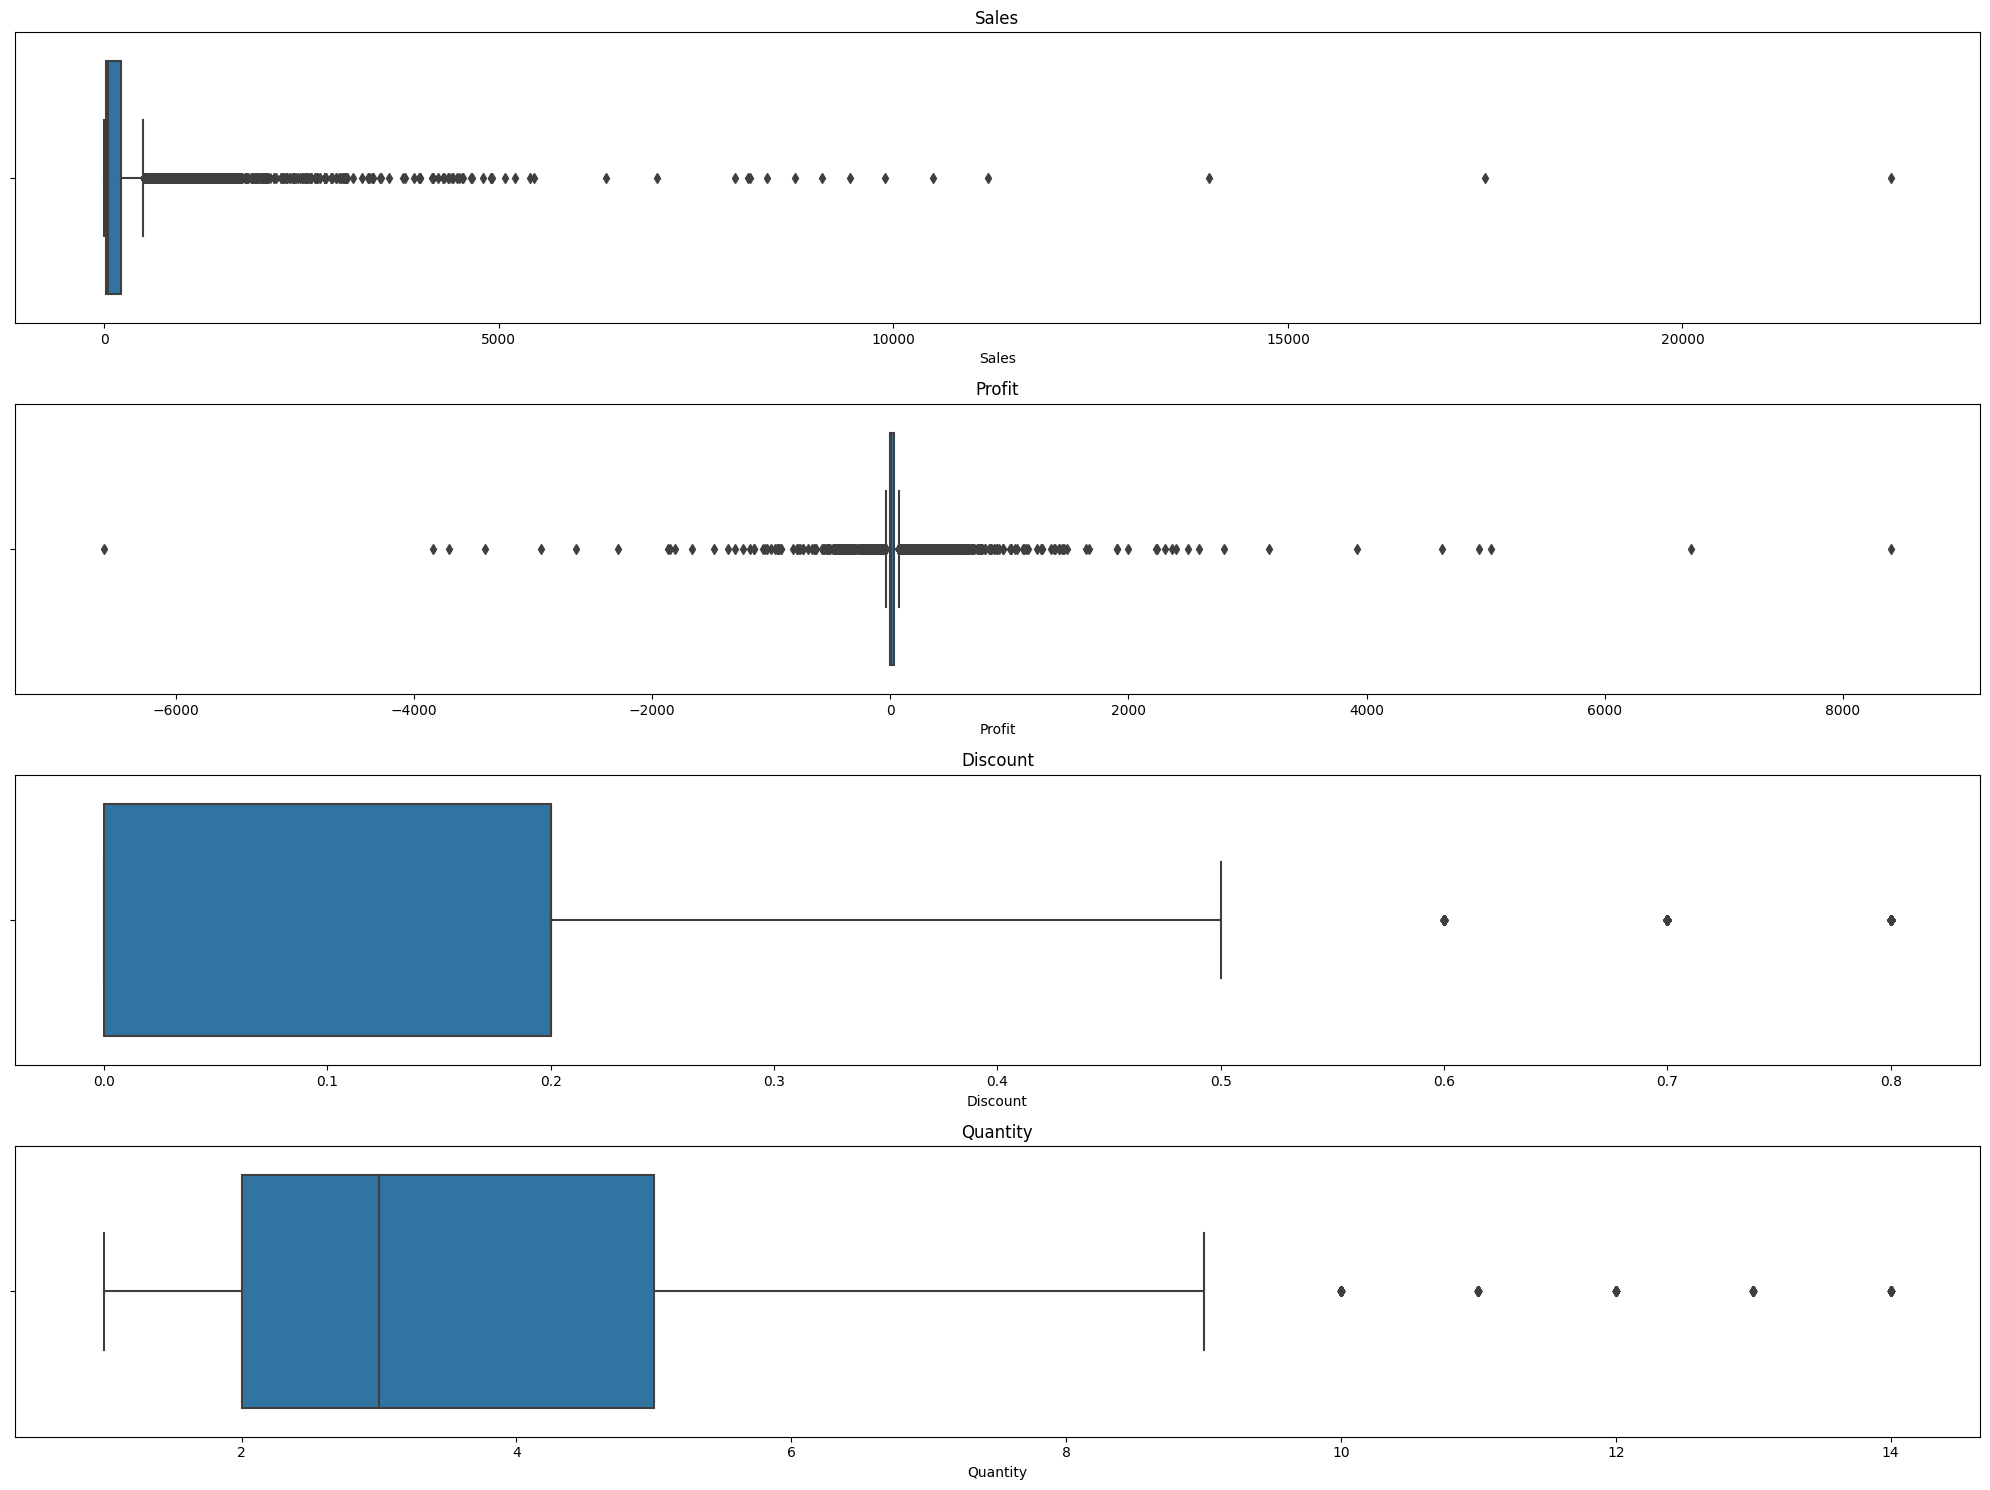

In [185]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [186]:
# Describe the data of Sales, Dicsount, Profit, and Quantity
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [187]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    return {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),
        'outliers_indices': outliers.index.tolist()
    }

outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    outliers_info[column] = identify_outliers(df, column)

# Print the outliers information
for column, info in outliers_info.items():
    print(f"Outliers in '{column}':")
    print(f"  Lower bound: {info['lower_bound']}")
    print(f"  Upper bound: {info['upper_bound']}")
    print(f"  Number of outliers: {info['number_of_outliers']}")

Outliers in 'Sales':
  Lower bound: -271.71000000000004
  Upper bound: 498.93
  Number of outliers: 1167
Outliers in 'Quantity':
  Lower bound: -2.5
  Upper bound: 9.5
  Number of outliers: 170
Outliers in 'Discount':
  Lower bound: -0.30000000000000004
  Upper bound: 0.5
  Number of outliers: 856
Outliers in 'Profit':
  Lower bound: -39.724125
  Upper bound: 70.816875
  Number of outliers: 1881


In [188]:
# Create a summary dictionary
outliers_summary = {key: {'lower_bound': value['lower_bound'], 
                          'upper_bound': value['upper_bound'], 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Convert the summary dictionary to a DataFrame
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Reorder the columns for clarity
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display the DataFrame
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table

,lower_bound,upper_bound,number_of_outliers
Sales,-272,499,1167
Quantity,-2,10,170
Discount,-0,0,856
Profit,-40,71,1881


### **Outliers Highlight** 
**Sales**
The Sales column displays a noteworthy presence of outliers, signifying a considerable departure from the usual range of values. This suggests frequent occurrences of exceptionally high or low sales figures that greatly exceed the anticipated values within this dataset.
- The 'usual' range for Sales falls roughly between -271.71 and 498.93. Any Sales figure below -271.71 or above 498.93 is categorized as an outlier. 
- Within the Sales column, 1167 entries are flagged as outliers, indicating transactions that significantly deviate from the typical sales range.

**Quantity**
The Quantity column exhibits a smaller count of outliers, indicating instances where the quantity of items ordered significantly deviates from the typical range of order quantities, either being notably high or low.
- The acceptable range spans from approximately -2.5 to 9.5. The presence of a negative lower bound suggests that low quantity values are within the expected range, likely due to the calculation not inherently considering the impossibility of negative quantities.
- There are 170 quantity entries outside of this range, indicating transactions involving notably low or high quantities compared to the norm.

**Discount**
- The standard range for discounts extends from about -0.30 to 0.50. Considering the impracticality of negative discounts (which would increase the price), any discount value of 0.5 or higher is deemed unusual within this dataset. 
- A total of 856 records feature discounts outside this typical range, pointing to special circumstances or potentially erroneous entries.

**Profit**
Similar to Sales, the Profit column displays a notable presence of outliers, indicating significant deviations from the typical expected profit margins. This suggests frequent occurrences of both exceptionally low and high-profit margins beyond the defined bounds.
- Values are marked as outliers if they fall below roughly -39.72 or exceed 70.82. This delineation reflects the typical profit (or loss) per transaction, with values outside this range being exceptionally high or low. 
- The presence of 1881 outlier values in the Profit column underscores a significant variability in profit margins, with numerous transactions yielding either substantially higher profits or incurring greater losses than usua



## Inferece :
**Profit Analysis**: The primary focus of the analysis is to investigate instances of negative profits within the dataset and discern the underlying reasons behind such occurrences. Removing outliers, particularly those associated with higher sales values, could obscure these critical insights. By retaining outliers, including those with exceptionally high or low sales figures, we maintain the integrity of the dataset for exploring the relationship between sales, discounts, and profits in each analysis segmentation.

**Holistic Understanding**: Retaining outliers allows for a more comprehensive understanding of the dataset. Outliers may contain valuable information about unique business scenarios, customer behaviors, or market trends that contribute to the analysis. Deleting outliers could lead to oversimplification and the loss of important nuances necessary for making informed business decisions.

**Data Integrity**: Eliminating outliers, especially those related to higher sales or profits values, may introduce bias and distort the dataset's distribution. This could impact the validity of descriptive statistical analyses, potentially leading to misleading conclusions or flawed recommendations. By preserving the outliers, we maintain the dataset's integrity and ensure that the analysis accurately reflects real-world variability.

# ** All Data Cleaned **

# 3. Data Concistency

In [189]:
# Check for mixed-type data in your df_ords dataframe.

for col in df.columns.tolist():
    mixeddata = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[mixeddata]) > 0:
        print(col)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_20456\2522293106.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixeddata = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_20456\2522293106.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixeddata = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_20456\2522293106.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixeddata = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_20456\2522293106.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixeddata = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_204

In [190]:
# Check for mixed-type data in your df_ords dataframe.
for col in df.columns:
    mixed_data = df[col].apply(type).nunique() > 1
    if mixed_data:
        print(col)

In [191]:
# Check 0 Value in each columns
for column in df.columns:
    if 0 in df[column].values:
        print(f"Coloumns : {column} that have a value of 0.")

Coloumns : Discount that have a value of 0.
Coloumns : Profit that have a value of 0.


### All data values are in line with expectations. All minimum and maximum values are as anticipated.

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

In [193]:
df.to_csv('SaaS_Sales_Data Cleaned.csv', index=False)

### **Saving Cleaned Data**